# Lab Activity Week 6

**Homework** Anything you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 1 - Review: Comparing Indoor vs Outdoor data
- Cut out any data that was part of your outdoor data set that was not taken outdoors or take a new outdoor data set that runs for an extra 30s to give you time to get outside and then cut out that 30s interval
  - Recall we learned methods for slicing dataframes in week 2
- Now produce histogram plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

In [5]:
Odata_untrimmed = pd.read_csv("outsidedata.csv")
Idata_untrimmed = pd.read_csv("insidedata.csv")

#mask off first bad data point for inside
first_mask = Idata_untrimmed['Humidity'] < 100
Idata = Idata_untrimmed[first_mask]

#mask off first bad data point for outside
first_mask = Odata_untrimmed["Humidity"] < 100
Odata = Odata_untrimmed[first_mask]

#mask off the outside data to be 297 rows
diff = 554 - 297
print("Difference: ",diff)
middle = int(diff/2)

#I want the midle 297 to account for travel time with the sensor
values = range(middle, (554 - middle) - 1)
values = list(values)
print(values)
Odata = Odata.iloc[values]
Odata

Difference:  257
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 32

,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
129,1.707957e+09,0,0,0,21.6,400669,47.1,1003.561,80.98
130,1.707957e+09,0,0,0,21.5,399246,47.2,1003.557,81.01
131,1.707957e+09,0,0,0,21.5,397832,47.3,1003.560,80.99
132,1.707957e+09,0,0,0,21.4,397129,47.4,1003.557,81.01
133,1.707957e+09,0,0,0,21.4,401146,47.6,1003.554,81.04
...,...,...,...,...,...,...,...,...,...
421,1.707957e+09,0,0,1,16.8,480631,62.7,1003.637,80.34
422,1.707957e+09,0,0,1,16.8,479606,62.6,1003.631,80.40
423,1.707957e+09,0,0,1,16.8,479265,62.5,1003.629,80.41
424,1.707957e+09,0,0,1,16.8,479265,62.4,1003.627,80.43


In [7]:
#reset indices of both data frames
Odata.reset_index(inplace=True)
Odata

Idata.reset_index(inplace=True)
Idata

,index,Time,PM10,PM25,PM100,Temperature,Gas,Humidity,Pressure,Altitude
0,1,1.707955e+09,0,1,2,27.0,42314,40.9,1004.856,70.12
1,2,1.707955e+09,0,1,2,27.0,54782,40.9,1004.850,70.17
2,3,1.707955e+09,0,0,1,27.0,66531,40.7,1004.844,70.22
3,4,1.707955e+09,0,0,1,27.1,76830,40.6,1004.843,70.23
4,5,1.707955e+09,0,0,1,27.1,85730,40.5,1004.843,70.23
...,...,...,...,...,...,...,...,...,...,...
291,292,1.707955e+09,0,0,0,27.2,339787,39.8,1004.845,70.21
292,293,1.707955e+09,0,0,0,27.2,339787,39.8,1004.845,70.22
293,294,1.707955e+09,0,0,0,27.2,340834,39.7,1004.864,70.05
294,295,1.707955e+09,0,0,0,27.2,341536,39.7,1004.879,69.93


In [63]:
cols = ["PM10", "PM25", "PM100", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
units = ["micro gram/m3","micro gram/m3","micro gram/m3","C","Ohm", "%", "hPa", "m"]

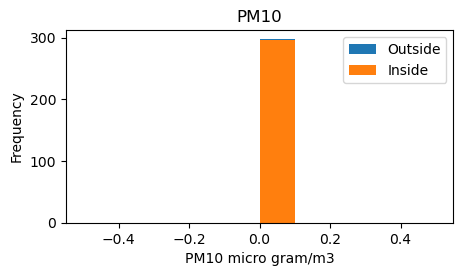

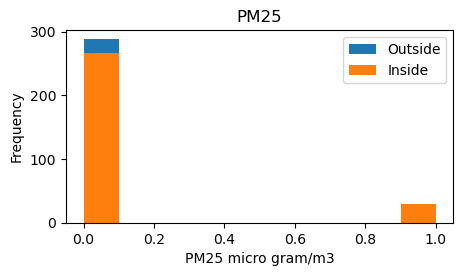

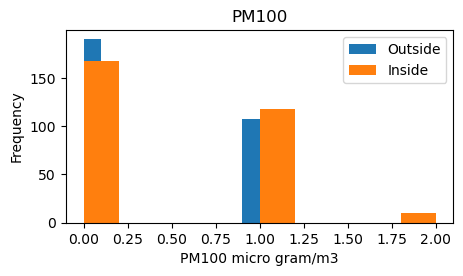

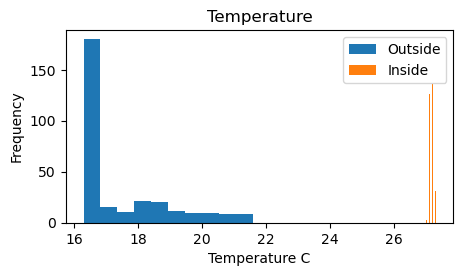

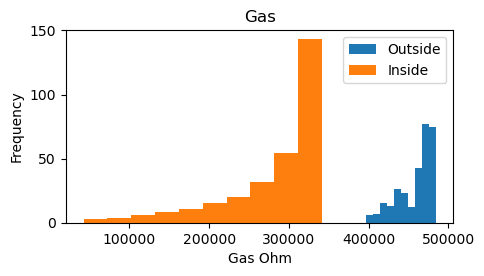

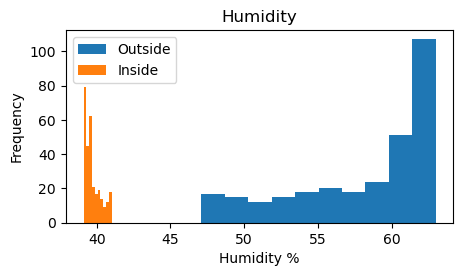

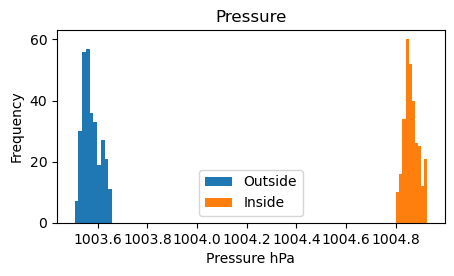

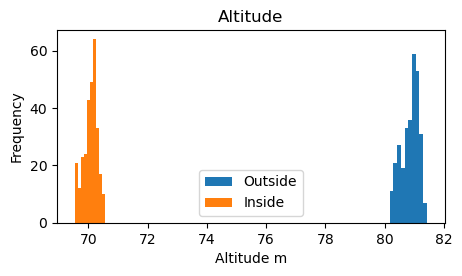

In [64]:
def hist_maker(Odata, Idata, same = False):
    
    for i in range(0,len(cols)):    
        fig1 = plt.figure(i, figsize=(5,2.5))
        
        label1 = "Outside"
        label2 = "Inside"
        title = cols[i]
        
        if same:
            label1 = "Our Data"
            label2 = "Other Data"
        
        plt.hist(Odata[cols[i]], label = label1)
        plt.hist(Idata[cols[i]], label = label2)
        

        plt.ylabel("Frequency")
        plt.xlabel(cols[i] + " " + units[i])
        plt.title(title)
        plt.legend()
        plt.show()

hist_maker(Odata, Idata)

In [26]:
def analysis(Odata, Idata):
    
    for i in range(0,8):
        outside_col = Odata[cols[i]]
        inside_col = Idata[cols[i]]

        #find mean uncertainty of each
        mean_inside = round(np.mean(inside_col), 4)
        mean_outside= round(np.mean(outside_col), 4)

        std_inside = round(np.std(inside_col), 4)
        std_outside = round(np.std(outside_col), 4)
        b
        print(cols[i])
        print(f"Inside: The mean for {cols[i]} inside is {mean_inside}. The std for {cols[i]} inside is {std_inside}")
        print(f"Outside: The mean for {cols[i]} outside is {mean_outside}. The std for {cols[i]} outside is {std_outside}")
        
        N = len(Odata)
        
        std_mean_inside = std_inside / (N)**(1/2)
        std_mean_outside = std_outside / (N)**(1/2)
        
        #use smaller derivation on the mean
        std_mean_using = min(std_mean_outside, std_mean_inside)
        
        mean_diff = abs(mean_outside - mean_inside)
        
        stds_away = round(mean_diff / std_mean_using, 2)
        
        print(f"The mean uncertainty is {round(std_mean_using,4)}")
        print(f"Our inside and outside {cols[i]} measurements are seperated by {stds_away}" + " sigma")
        print("")
        
analysis(Odata, Idata)



PM10
Inside: The mean for PM10 inside is 0.0. The std for PM10 inside is 0.0
Outside: The mean for PM10 outside is 0.0. The std for PM10 outside is 0.0
The mean uncertainty is 0.0
Our inside and outside PM10 measurements are seperated by nan sigma

PM25
Inside: The mean for PM25 inside is 0.098. The std for PM25 inside is 0.2973
Outside: The mean for PM25 outside is 0.0303. The std for PM25 outside is 0.1714
The mean uncertainty is 0.0099
Our inside and outside PM25 measurements are seperated by 6.81 sigma

PM100
Inside: The mean for PM100 inside is 0.4662. The std for PM100 inside is 0.5625
Outside: The mean for PM100 outside is 0.3603. The std for PM100 outside is 0.4801
The mean uncertainty is 0.0279
Our inside and outside PM100 measurements are seperated by 3.8 sigma

Temperature
Inside: The mean for Temperature inside is 27.1659. The std for Temperature inside is 0.0674
Outside: The mean for Temperature outside is 17.5189. The std for Temperature outside is 1.4012
The mean uncerta

C:\Users\User\AppData\Local\Temp\ipykernel_35740\2734416585.py:28: RuntimeWarning: invalid value encountered in double_scalars
  stds_away = round(mean_diff / std_mean_using, 2)


We did not take enough data for the central limit theorem to apply for our air quality columns.

### Step 2: Comparing sensors
- Get inside/outside data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 1. - Do the same statistical comparison of your outside data with the outside data from the other group.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

In [108]:
Odata_untrimmed2 = pd.read_csv("lab4outside.csv")
Idata_untrimmed2 = pd.read_csv("lab4inside.csv")

#mask off first bad data point for inside
first_mask2 = Idata_untrimmed2['Humidity'] < 100
Idata2 = Idata_untrimmed2[first_mask2]

#mask off first bad data point for outside
first_mask2 = Odata_untrimmed2["Humidity"] < 100
Odata2 = Odata_untrimmed2[first_mask2]

Odata2

,Time,pm25,pm10,Temperature,Pressure,Humidity,Altitude,Gas
1,1.707954e+09,1,10,24.400703,1005.177066,43.850386,67.430546,96417
2,1.707954e+09,1,10,24.433320,1005.175572,43.744374,67.443063,102830
3,1.707954e+09,1,13,24.470430,1005.181453,43.602382,67.393781,110294
4,1.707954e+09,1,13,24.505195,1005.180036,43.460228,67.405659,117187
5,1.707954e+09,1,13,24.531367,1005.183433,43.335446,67.377188,124646
...,...,...,...,...,...,...,...,...
292,1.707955e+09,0,18,25.356562,1004.574097,47.667819,72.484518,196023
293,1.707955e+09,0,18,25.361836,1004.575851,47.312912,72.469812,196579
294,1.707955e+09,0,19,25.371406,1004.576034,47.177046,72.468282,195140
295,1.707955e+09,0,19,25.379219,1004.576781,47.302591,72.462021,194592


In [109]:
#renaming columns for indexing to work :)
cols1 = ["Time", "PM25", "PM10", "Temperature", "Pressure", "Humidity", "Altitude", "Gas"]
Idata2.columns = cols1
Idata2
Odata2.columns = cols1
Odata2

,Time,PM25,PM10,Temperature,Pressure,Humidity,Altitude,Gas
1,1.707954e+09,1,10,24.400703,1005.177066,43.850386,67.430546,96417
2,1.707954e+09,1,10,24.433320,1005.175572,43.744374,67.443063,102830
3,1.707954e+09,1,13,24.470430,1005.181453,43.602382,67.393781,110294
4,1.707954e+09,1,13,24.505195,1005.180036,43.460228,67.405659,117187
5,1.707954e+09,1,13,24.531367,1005.183433,43.335446,67.377188,124646
...,...,...,...,...,...,...,...,...
292,1.707955e+09,0,18,25.356562,1004.574097,47.667819,72.484518,196023
293,1.707955e+09,0,18,25.361836,1004.575851,47.312912,72.469812,196579
294,1.707955e+09,0,19,25.371406,1004.576034,47.177046,72.468282,195140
295,1.707955e+09,0,19,25.379219,1004.576781,47.302591,72.462021,194592


In [110]:
#reset indices of both data frames so plotting works
Idata2.reset_index(inplace=True)
Idata2

Odata2.reset_index(inplace=True)
Odata2

,index,Time,PM25,PM10,Temperature,Pressure,Humidity,Altitude,Gas
0,1,1.707954e+09,1,10,24.400703,1005.177066,43.850386,67.430546,96417
1,2,1.707954e+09,1,10,24.433320,1005.175572,43.744374,67.443063,102830
2,3,1.707954e+09,1,13,24.470430,1005.181453,43.602382,67.393781,110294
3,4,1.707954e+09,1,13,24.505195,1005.180036,43.460228,67.405659,117187
4,5,1.707954e+09,1,13,24.531367,1005.183433,43.335446,67.377188,124646
...,...,...,...,...,...,...,...,...,...
291,292,1.707955e+09,0,18,25.356562,1004.574097,47.667819,72.484518,196023
292,293,1.707955e+09,0,18,25.361836,1004.575851,47.312912,72.469812,196579
293,294,1.707955e+09,0,19,25.371406,1004.576034,47.177046,72.468282,195140
294,295,1.707955e+09,0,19,25.379219,1004.576781,47.302591,72.462021,194592


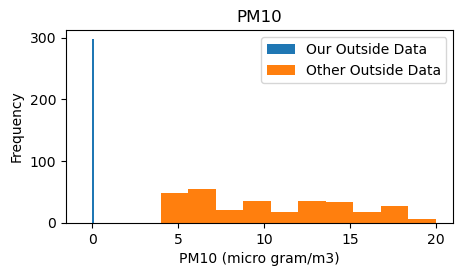

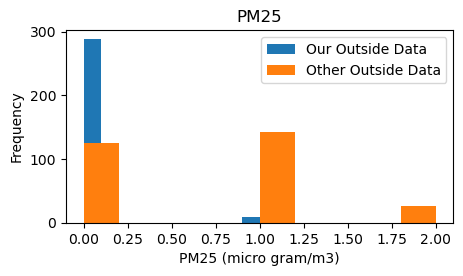

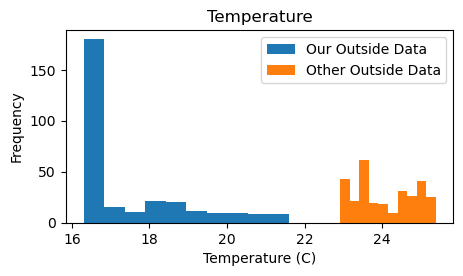

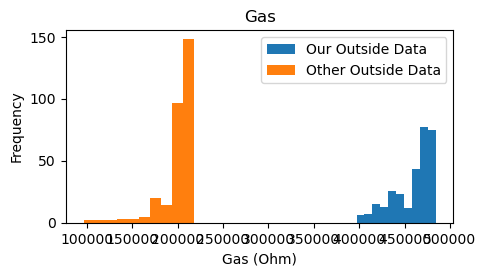

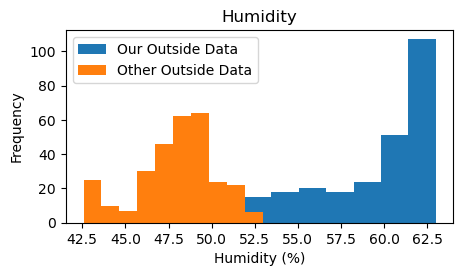

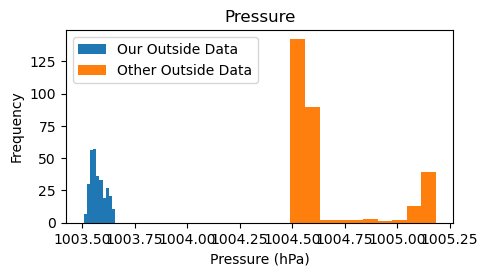

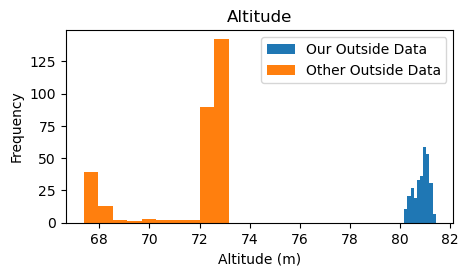

In [112]:
cols = ["PM10", "PM25", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
units = ["micro gram/m3","micro gram/m3", "C","Ohm", "%", "hPa", "m"]

for i in range(0,len(cols)):    
        fig1 = plt.figure(i, figsize=(5,2.5))
        
        plt.hist(Odata[cols[i]], label = "Our Outside Data")
        plt.hist(Odata2[cols[i]], label = "Other Outside Data")
        
        plt.ylabel("Frequency")
        plt.xlabel(cols[i] + " (" + units[i] + ")")
        plt.title(cols[i])
        plt.legend()
        plt.show()

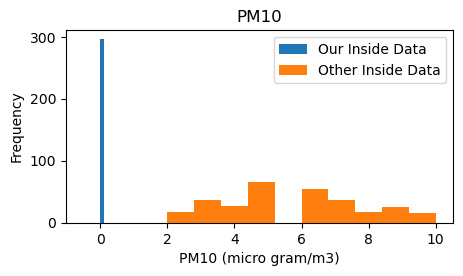

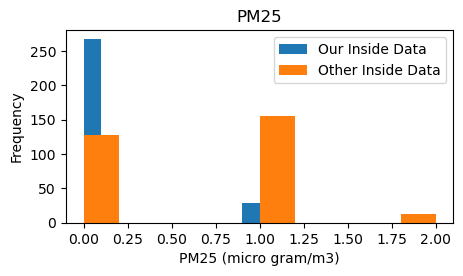

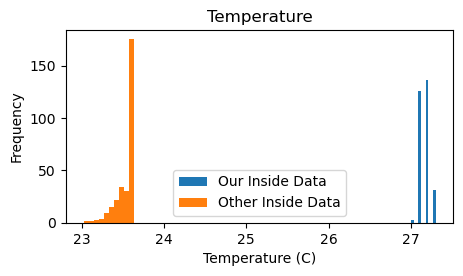

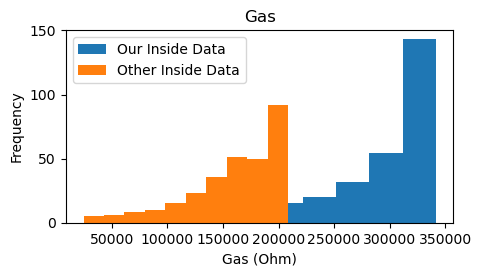

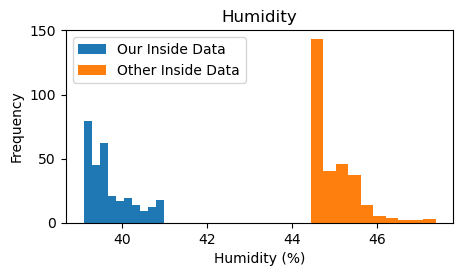

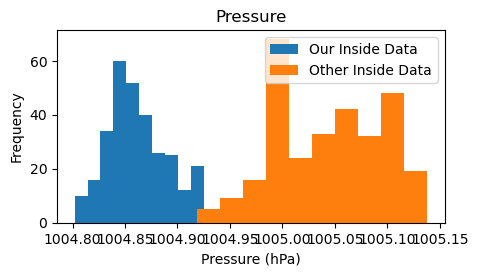

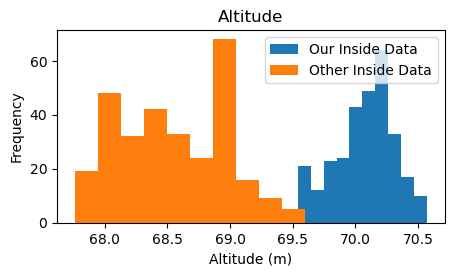

In [113]:
cols = ["PM10", "PM25", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
units = ["micro gram/m3","micro gram/m3", "C","Ohm", "%", "hPa", "m"]

for i in range(0,len(cols)):    
        fig1 = plt.figure(i, figsize=(5,2.5))
        
        plt.hist(Idata[cols[i]], label = "Our Inside Data")
        plt.hist(Idata2[cols[i]], label = "Other Inside Data")
        
        plt.ylabel("Frequency")
        plt.xlabel(cols[i] + " (" + units[i] + ")")
        plt.title(cols[i])
        plt.legend()
        plt.show()

In [116]:
cols = ["PM10", "PM25", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
for i in range(0,len(cols)):
    our_col = Odata[cols[i]]
    other_col = Odata2[cols[i]]

    #find mean uncertainty of each
    mean_our = round(np.mean(our_col), 4)
    mean_other = round(np.mean(other_col), 4)

    std_our = round(np.std(our_col), 4)
    std_other = round(np.std(other_col), 4)
    
    print(cols[i])
    print(f"Inside: The mean for our {cols[i]} is {mean_our}. The std for our {cols[i]} is {std_our}")
    print(f"Outside: The mean for the other group's {cols[i]}  is {mean_other}. The std for their {cols[i]} is {std_other}")

    N = len(Odata)

    std_mean_our = std_our / (N)**(1/2)
    std_mean_other = std_other / (N)**(1/2)

    #use smaller derivation on the mean
    std_mean_using = min(std_mean_our, std_mean_other)

    mean_diff = abs(mean_our - mean_other)

    stds_away = round(mean_diff / std_mean_using, 2)

    print(f"The mean uncertainty is {round(std_mean_using,4)}")
    print(f"Our data and the other group's {cols[i]} data measurements are seperated by {stds_away}" + " sigma")
    print("")

PM10
Inside: The mean for our PM10 is 0.0. The std for our PM10 is 0.0
Outside: The mean for the other group's PM10  is 10.4257. The std for their PM10 is 4.4821
The mean uncertainty is 0.0
Our data and the other group's PM10 data measurements are seperated by inf sigma

PM25
Inside: The mean for our PM25 is 0.0303. The std for our PM25 is 0.1714
Outside: The mean for the other group's PM25  is 0.6655. The std for their PM25 is 0.6364
The mean uncertainty is 0.0099
Our data and the other group's PM25 data measurements are seperated by 63.87 sigma

Temperature
Inside: The mean for our Temperature is 17.5189. The std for our Temperature is 1.4012
Outside: The mean for the other group's Temperature  is 24.0766. The std for their Temperature is 0.773
The mean uncertainty is 0.0449
Our data and the other group's Temperature data measurements are seperated by 146.2 sigma

Gas
Inside: The mean for our Gas is 459107.5556. The std for our Gas is 21700.4901
Outside: The mean for the other group'

C:\Users\User\AppData\Local\Temp\ipykernel_35740\706561298.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  stds_away = round(mean_diff / std_mean_using, 2)


In [119]:
cols = ["PM10", "PM25", "Temperature", "Gas", "Humidity", "Pressure", "Altitude"]
for i in range(0,len(cols)):
    our_col = Idata[cols[i]]
    other_col = Idata2[cols[i]]

    #find mean uncertainty of each
    mean_our = round(np.mean(our_col), 4)
    mean_other = round(np.mean(other_col), 4)

    std_our = round(np.std(our_col), 4)
    std_other = round(np.std(other_col), 4)
    
    print(cols[i])
    print(f"Inside: The mean for our {cols[i]} is {mean_our}. The std for our {cols[i]} is {std_our}")
    print(f"Outside: The mean for the other group's {cols[i]}  is {mean_other}. The std for their {cols[i]} is {std_other}")

    N = len(Odata)

    std_mean_our = std_our / (N)**(1/2)
    std_mean_other = std_other / (N)**(1/2)

    #use smaller derivation on the mean
    std_mean_using = min(std_mean_our, std_mean_other)

    mean_diff = abs(mean_our - mean_other)

    stds_away = round(mean_diff / std_mean_using, 2)

    print(f"The mean uncertainty is {round(std_mean_using,4)}")
    print(f"Our data and the other group's {cols[i]} data measurements are seperated by {stds_away}" + " sigma")
    print("")

PM10
Inside: The mean for our PM10 is 0.0. The std for our PM10 is 0.0
Outside: The mean for the other group's PM10  is 5.6757. The std for their PM10 is 2.1252
The mean uncertainty is 0.0
Our data and the other group's PM10 data measurements are seperated by inf sigma

PM25
Inside: The mean for our PM25 is 0.098. The std for our PM25 is 0.2973
Outside: The mean for the other group's PM25  is 0.6081. The std for their PM25 is 0.5651
The mean uncertainty is 0.0173
Our data and the other group's PM25 data measurements are seperated by 29.57 sigma

Temperature
Inside: The mean for our Temperature is 27.1659. The std for our Temperature is 0.0674
Outside: The mean for the other group's Temperature  is 23.5439. The std for their Temperature is 0.1184
The mean uncertainty is 0.0039
Our data and the other group's Temperature data measurements are seperated by 926.12 sigma

Gas
Inside: The mean for our Gas is 282732.2736. The std for our Gas is 63134.3712
Outside: The mean for the other group'

C:\Users\User\AppData\Local\Temp\ipykernel_35740\449614806.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  stds_away = round(mean_diff / std_mean_using, 2)


Our data for almost every column doesn't line up. I believe the position of our sensors and the exact location we were outside altered the precision of our data. For example, I was holding my sensor close to my body while outside which may have skewed the temperature to greater then the actual temperature.

### Step 3: More locations
- Consider other areas you could take your sensors where you might find a larger change in the data: for example, is there somewhere near lab where the air quality might be significantly worse?
- Set up your system to be able to run in a way that would allow you to get to that location and take ~5 minutes of data.
  - This might require adding additional input arguments, like a delayed start time, or changing to running indefinitely but making sure that your data is being collected and saved even if your script does not run gracefully.
- Compare this new set of data with your other outdoor data, including the same set of graphs and statistical comparisons made for earlier steps.

In [120]:
Odata_untrimmed = pd.read_csv("smokedata.csv")

### Step 4: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How would you quantify this?
  - HINT: there are linear correlation comparisons you can make mathematically such as the Pearson's correlation or similar (linear $R^2$), is the correlation you are seeing linear? Can you implement these in code?
- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.
  - This will require coming up with a way to ensure that the times match between sensors, what about the way you are collecting data ensures that this is true?
 

In [ ]:
#plot temp vs humidity using smoke data
#make it a scatter plot!
#the hidden variable is time, both the temp and humidity must occurr at the same time

In [ ]:
#plot a line of best fit on top of the last graph (look up on matplotlib functions for this)

In [ ]:
#make a plotting function and run in a loop to speed up work